In [1]:
# 지피유 확인!!
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
2


In [2]:
torch.__version__

'1.4.0'

In [3]:
!pwd

/home/ubuntu/jonghee


In [4]:
%cd ./gitclone/Informer2020

/home/ubuntu/jonghee/gitclone/Informer2020


# breath_id 마다의 80개의 pressure 중 앞쪽 40개를 예측해라!!

In [70]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time

from sklearn import metrics

df = pd.read_csv('../../dataset/train.csv')

In [71]:
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
5,6,1,20,50,0.169698,27.259866,0,12.867706
6,7,1,20,50,0.203708,27.127486,0,14.695562
7,8,1,20,50,0.237723,26.807732,0,15.890699
8,9,1,20,50,0.271776,27.864715,0,15.539188
9,10,1,20,50,0.305732,28.313036,0,15.750094


In [72]:
df.groupby(['breath_id']).count().mean()
# 모든 breath_id는 80개이다.

id           80.0
R            80.0
C            80.0
time_step    80.0
u_in         80.0
u_out        80.0
pressure     80.0
dtype: float64

In [52]:
df_sample = df[df['breath_id'] < 5].reset_index(drop=True) # 인덱스가 이제 0부터 시작한다!
df_sample

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
5,6,1,20,50,0.169698,27.259866,0,12.867706
6,7,1,20,50,0.203708,27.127486,0,14.695562
7,8,1,20,50,0.237723,26.807732,0,15.890699
8,9,1,20,50,0.271776,27.864715,0,15.539188
9,10,1,20,50,0.305732,28.313036,0,15.750094


In [53]:
def plot_sample(sample_id, df):
    df_breath = df[df['breath_id'] == sample_id]
    r, c  = df_breath[['R', 'C']].values[0] # r,c는 한 호흡에서 안 변한다!

    cols = ['u_in', 'u_out', 'pressure'] if 'pressure' in df.columns else ['u_in', 'u_out'] # 훈련일 땐 presure가 있지만 test일 땐 없다.
    
    plt.figure(figsize=(12, 4))
    for col in cols: # 여기서 돌면서 한 그림에 cols의 선을 그린다.
        plt.plot(df_breath['time_step'], df_breath[col], label=col)
        
    plt.legend()
    plt.title(f'Sample {sample_id} - R={r}, C={c}')

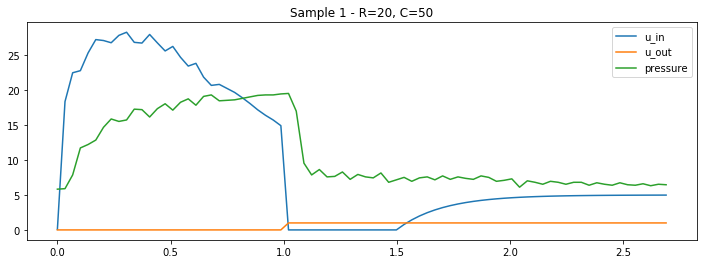

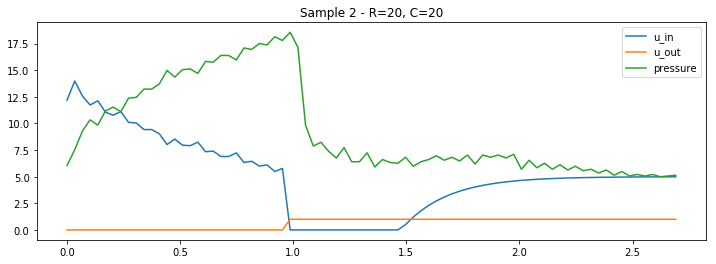

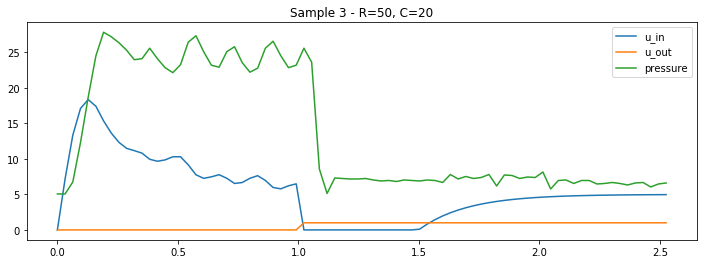

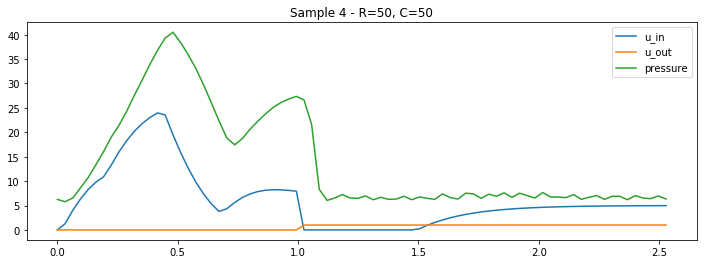

In [54]:
for i in df_sample['breath_id'].unique(): # 1~4까지 돈다.
    plot_sample(i, df)

# 그냥 날짜 변환만 해서 넣어보자.

In [77]:
df_date = df.reset_index()
df_date = df_date.rename(columns={'index':'date'})
df_date

,date,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,0,1,1,20,50,0.000000,0.083334,0,5.837492
1,1,2,1,20,50,0.033652,18.383041,0,5.907794
2,2,3,1,20,50,0.067514,22.509278,0,7.876254
3,3,4,1,20,50,0.101542,22.808822,0,11.742872
4,4,5,1,20,50,0.135756,25.355850,0,12.234987
5,5,6,1,20,50,0.169698,27.259866,0,12.867706
6,6,7,1,20,50,0.203708,27.127486,0,14.695562
7,7,8,1,20,50,0.237723,26.807732,0,15.890699
8,8,9,1,20,50,0.271776,27.864715,0,15.539188
9,9,10,1,20,50,0.305732,28.313036,0,15.750094


In [78]:
import datetime

def change_index_to_date(value):
    date = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
    return date

df_date.date = df_date.date.apply(lambda x: change_index_to_date(x))
df_date.drop(['id'], axis=1, inplace=True)
df_date

,date,breath_id,R,C,time_step,u_in,u_out,pressure
0,1970-01-01 09:00:00,1,20,50,0.000000,0.083334,0,5.837492
1,1970-01-01 09:00:01,1,20,50,0.033652,18.383041,0,5.907794
2,1970-01-01 09:00:02,1,20,50,0.067514,22.509278,0,7.876254
3,1970-01-01 09:00:03,1,20,50,0.101542,22.808822,0,11.742872
4,1970-01-01 09:00:04,1,20,50,0.135756,25.355850,0,12.234987
5,1970-01-01 09:00:05,1,20,50,0.169698,27.259866,0,12.867706
6,1970-01-01 09:00:06,1,20,50,0.203708,27.127486,0,14.695562
7,1970-01-01 09:00:07,1,20,50,0.237723,26.807732,0,15.890699
8,1970-01-01 09:00:08,1,20,50,0.271776,27.864715,0,15.539188
9,1970-01-01 09:00:09,1,20,50,0.305732,28.313036,0,15.750094


In [79]:
df_date.shape

(6036000, 8)

In [80]:
df_numpy = df_date.to_numpy()
df_numpy.shape

(6036000, 8)

In [81]:
df_numpy_80 = df_numpy.reshape(-1, 80, df_numpy.shape[-1])
df_numpy_80

array([[['1970-01-01 09:00:00', 1, 20, ..., 0.08333400563464438, 0,
         5.837491705069121],
        ['1970-01-01 09:00:01', 1, 20, ..., 18.38304147263472, 0,
         5.907793850520346],
        ['1970-01-01 09:00:02', 1, 20, ..., 22.509277769756217, 0,
         7.876253923154397],
        ...,
        ['1970-01-01 09:01:17', 1, 20, ..., 4.9818473950222355, 1,
         6.329606723227638],
        ['1970-01-01 09:01:18', 1, 20, ..., 4.984683161808017, 1,
         6.540513159581282],
        ['1970-01-01 09:01:19', 1, 20, ..., 4.987079042064362, 1,
         6.470211014130072]],

       [['1970-01-01 09:01:20', 2, 20, ..., 12.184337517135212, 0,
         6.048398141422782],
        ['1970-01-01 09:01:21', 2, 20, ..., 13.980205443281347, 0,
         7.524743195898316],
        ['1970-01-01 09:01:22', 2, 20, ..., 12.574162534257026, 0,
         9.28229683217872],
        ...,
        ['1970-01-01 09:02:37', 2, 20, ..., 4.983856990615849, 1,
         4.993865959654523],
        ['1970-0

In [82]:
df_numpy_80.shape, len(df_fe.breath_id.unique())
# 일치한다.

((75450, 80, 8), 75450)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_numpy_80, test_size=0.1, random_state=42)

In [84]:
X_train.shape, X_test.shape

((67905, 80, 8), (7545, 80, 8))

In [86]:
df_train = X_train.reshape(-1, df_date.shape[-1])
df_train.shape

(5432400, 8)

In [87]:
df_test = X_test.reshape(-1, df_date.shape[-1])
df_test.shape

(603600, 8)

In [88]:
train = pd.DataFrame(df_train, columns=df_date.columns)
train.sort_values(by=['date'], ascending=True, inplace=True)
train

,date,breath_id,R,C,time_step,u_in,u_out,pressure
1856160,1970-01-01 09:00:00,1,20,50,0,0.083334,0,5.83749
1856161,1970-01-01 09:00:01,1,20,50,0.0336523,18.383,0,5.90779
1856162,1970-01-01 09:00:02,1,20,50,0.0675144,22.5093,0,7.87625
1856163,1970-01-01 09:00:03,1,20,50,0.101542,22.8088,0,11.7429
1856164,1970-01-01 09:00:04,1,20,50,0.135756,25.3559,0,12.235
1856165,1970-01-01 09:00:05,1,20,50,0.169698,27.2599,0,12.8677
1856166,1970-01-01 09:00:06,1,20,50,0.203708,27.1275,0,14.6956
1856167,1970-01-01 09:00:07,1,20,50,0.237723,26.8077,0,15.8907
1856168,1970-01-01 09:00:08,1,20,50,0.271776,27.8647,0,15.5392
1856169,1970-01-01 09:00:09,1,20,50,0.305732,28.313,0,15.7501


In [89]:
# 모델에 넣기 위해선 csv로 저장을 해놔야한다!
train.drop(['breath_id'], axis=1, inplace=True)
train.to_csv('../../dataset/df_train.csv', index=False)
pd.read_csv('../../dataset/df_train.csv')

,date,R,C,time_step,u_in,u_out,pressure
0,1970-01-01 09:00:00,20,50,0.000000,0.083334,0,5.837492
1,1970-01-01 09:00:01,20,50,0.033652,18.383041,0,5.907794
2,1970-01-01 09:00:02,20,50,0.067514,22.509278,0,7.876254
3,1970-01-01 09:00:03,20,50,0.101542,22.808822,0,11.742872
4,1970-01-01 09:00:04,20,50,0.135756,25.355850,0,12.234987
5,1970-01-01 09:00:05,20,50,0.169698,27.259866,0,12.867706
6,1970-01-01 09:00:06,20,50,0.203708,27.127486,0,14.695562
7,1970-01-01 09:00:07,20,50,0.237723,26.807732,0,15.890699
8,1970-01-01 09:00:08,20,50,0.271776,27.864715,0,15.539188
9,1970-01-01 09:00:09,20,50,0.305732,28.313036,0,15.750094


In [90]:
test = pd.DataFrame(df_test, columns=df_date.columns)
test.sort_values(by=['date'], ascending=True, inplace=True)
test

,date,breath_id,R,C,time_step,u_in,u_out,pressure
409760,1970-01-01 09:46:40,42,50,20,0,0,0,6.89202
409761,1970-01-01 09:46:41,42,50,20,0.034739,0,0,6.0484
409762,1970-01-01 09:46:42,42,50,20,0.069129,0,0,6.54051
409763,1970-01-01 09:46:43,42,50,20,0.103087,0,0,6.47021
409764,1970-01-01 09:46:44,42,50,20,0.137914,0,0,6.54051
409765,1970-01-01 09:46:45,42,50,20,0.17198,0.254736,0,6.54051
409766,1970-01-01 09:46:46,42,50,20,0.206033,0.679671,0,6.54051
409767,1970-01-01 09:46:47,42,50,20,0.24106,1.05132,0,6.82172
409768,1970-01-01 09:46:48,42,50,20,0.275097,1.38946,0,6.82172
409769,1970-01-01 09:46:49,42,50,20,0.309251,1.71604,0,6.75142


In [91]:
# 모델에 넣기 위해선 csv로 저장을 해놔야한다!
test.drop(['breath_id'], axis=1, inplace=True)
test.to_csv('../../dataset/df_test.csv', index=False)
pd.read_csv('../../dataset/df_test.csv')

,date,R,C,time_step,u_in,u_out,pressure
0,1970-01-01 09:46:40,50,20,0.000000,0.000000,0,6.892024
1,1970-01-01 09:46:41,50,20,0.034739,0.000000,0,6.048398
2,1970-01-01 09:46:42,50,20,0.069129,0.000000,0,6.540513
3,1970-01-01 09:46:43,50,20,0.103087,0.000000,0,6.470211
4,1970-01-01 09:46:44,50,20,0.137914,0.000000,0,6.540513
5,1970-01-01 09:46:45,50,20,0.171980,0.254736,0,6.540513
6,1970-01-01 09:46:46,50,20,0.206033,0.679671,0,6.540513
7,1970-01-01 09:46:47,50,20,0.241060,1.051322,0,6.821722
8,1970-01-01 09:46:48,50,20,0.275097,1.389456,0,6.821722
9,1970-01-01 09:46:49,50,20,0.309251,1.716037,0,6.751420


## 모델 훈련시키기

https://min23th.tistory.com/24

In [92]:
%cd /home/ubuntu/jonghee/gitclone/Informer2020

/home/ubuntu/jonghee/gitclone/Informer2020


In [93]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [139]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' ###### 개인 데이터는 custom으로 해야한다. ######
args.root_path = '../../dataset/' ###### root path of data file ######
args.data_path = 'df_train.csv' ###### data file ######
args.features = 'M' ###### forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'pressure' ###### target feature in S or MS task ######
args.freq = 's' ###### freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 160 ###### input sequence length of Informer encoder, 한 breath_id마다 80개의 데이터라서
args.label_len = 80 ###### start token length of Informer decoder, 예제 코드보니까 seq_len의 반이라서...
args.pred_len = 40 ###### prediction sequence length, 이건 또 label_len의 반이라서...
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]
# 우리가 예측해야하는 건 80개의 앞부분 40개이다!


args.enc_in = 6 ###### encoder input size, date컬럼을 제외한 나머지 컬럼 개수
args.dec_in = 6 ###### decoder input size, date컬럼을 제외한 나머지 컬럼 개수
args.c_out = 1 ###### output size, 우린 pressure 하나만 필요하다
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.do_predict= True ############### 이걸로 예측한다! ################
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 's' # 오잉 왜 h로 돼있었지??

args.batch_size = 512 ###### 배치 사이즈 ######
args.learning_rate = 0.0001
args.loss = 'mae'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 20 ###### 에폭 ######
args.patience = 3
args.des = 'exp'
args.inverse = True # 이걸로 standardscaler로 바뀐 값을 되돌려 놓는다!

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = True
args.devices = '0,1'

In [140]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [141]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'custom', 'root_path': '../../dataset/', 'data_path': 'df_train.csv', 'features': 'M', 'target': 'pressure', 'freq': 's', 'checkpoints': './informer_checkpoints', 'seq_len': 160, 'label_len': 80, 'pred_len': 40, 'enc_in': 6, 'dec_in': 6, 'c_out': 1, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'do_predict': True, 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 512, 'learning_rate': 0.0001, 'loss': 'mae', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 20, 'patience': 3, 'des': 'exp', 'inverse': True, 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': True, 'devices': '0,1', 'detail_freq': 's'}


In [142]:
Exp = Exp_Informer

In [143]:
range(args.itr)

range(0, 1)

In [144]:
!nvidia-smi

Fri Nov  5 09:25:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:00:06.0 Off |                    0 |
| N/A   59C    P0    50W / 250W |  12866MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:00:07.0 Off |                    0 |
| N/A   59C    P0    49W / 250W |  12692MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [145]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftM_sl160_ll80_pl40_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 3802480
val 543202
test 1086441
	iters: 100, epoch: 1 | loss: 126.4275131
	speed: 0.4235s/iter; left time: 62855.6787s
	iters: 200, epoch: 1 | loss: 132.0038910
	speed: 0.4278s/iter; left time: 63446.0757s


KeyboardInterrupt: 

In [ ]:
# 훈련 결과 시각화

# 피처 엔지니어링해서 모델 훈련해보기

In [60]:
def add_features(df):
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    df['cross']= df['u_in']*df['u_out']
    df['cross2']= df['time_step']*df['u_out']
    
    
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    df['one'] = 1
    df['count'] = (df['one']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] =df['u_in_cumsum'] /df['count']
    
    #df['u_in_lag']=0
    #df['u_in_lag2']=0
    #for i in range(df.shape[0]):
        #if df['breath_id'][i]==df['breath_id'][i+1]:
        #    df['u_in_lag'][i+1]=df['u_in'][i]
        #else:
        #    df['u_in_lag'][i+1]=0
        #if df['breath_id'][i]==df['breath_id'][i+2]:
        #    df['u_in_lag'][i+2]=df['u_in'][i]
        #else:
        #    df['u_in_lag'][i+2]=0
        #if i/10000==round(i/10000):
        #    print(i)
    
    df['breath_id_lag']=df['breath_id'].shift(1).fillna(0)
    df['breath_id_lag2']=df['breath_id'].shift(2).fillna(0)
    df['breath_id_lagsame']=np.select([df['breath_id_lag']==df['breath_id']],[1],0)
    df['breath_id_lag2same']=np.select([df['breath_id_lag2']==df['breath_id']],[1],0)
    df['u_in_lag'] = df['u_in'].shift(1).fillna(0)
    df['u_in_lag'] = df['u_in_lag']*df['breath_id_lagsame']
    df['u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    df['u_in_lag2'] = df['u_in_lag2']*df['breath_id_lag2same']
    df['u_out_lag2'] = df['u_out'].shift(2).fillna(0)
    df['u_out_lag2'] = df['u_out_lag2']*df['breath_id_lag2same']
    #df['u_in_lag'] = df['u_in'].shift(2).fillna(0)
    
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['RC'] = df['R']+df['C']
    df = pd.get_dummies(df)
    return df

df_fe = add_features(df) # feature ngineering
df_fe

,id,breath_id,time_step,u_in,u_out,pressure,area,cross,cross2,u_in_cumsum,...,C_50,RC_2010,RC_2020,RC_2050,RC_5010,RC_5020,RC_5050,RC_510,RC_520,RC_550
0,1,1,0.000000,0.083334,0,5.837492,0.000000,0.000000,0.000000,0.083334,...,1,0,0,1,0,0,0,0,0,0
1,2,1,0.033652,18.383041,0,5.907794,0.618632,0.000000,0.000000,18.466375,...,1,0,0,1,0,0,0,0,0,0
2,3,1,0.067514,22.509278,0,7.876254,2.138333,0.000000,0.000000,40.975653,...,1,0,0,1,0,0,0,0,0,0
3,4,1,0.101542,22.808822,0,11.742872,4.454391,0.000000,0.000000,63.784476,...,1,0,0,1,0,0,0,0,0,0
4,5,1,0.135756,25.355850,0,12.234987,7.896588,0.000000,0.000000,89.140326,...,1,0,0,1,0,0,0,0,0,0
5,6,1,0.169698,27.259866,0,12.867706,12.522527,0.000000,0.000000,116.400192,...,1,0,0,1,0,0,0,0,0,0
6,7,1,0.203708,27.127486,0,14.695562,18.048611,0.000000,0.000000,143.527677,...,1,0,0,1,0,0,0,0,0,0
7,8,1,0.237723,26.807732,0,15.890699,24.421415,0.000000,0.000000,170.335409,...,1,0,0,1,0,0,0,0,0,0
8,9,1,0.271776,27.864715,0,15.539188,31.994388,0.000000,0.000000,198.200124,...,1,0,0,1,0,0,0,0,0,0
9,10,1,0.305732,28.313036,0,15.750094,40.650583,0.000000,0.000000,226.513160,...,1,0,0,1,0,0,0,0,0,0


In [61]:
df_fe.columns

Index(['id', 'breath_id', 'time_step', 'u_in', 'u_out', 'pressure', 'area',
       'cross', 'cross2', 'u_in_cumsum', 'one', 'count', 'u_in_cummean',
       'breath_id_lag', 'breath_id_lag2', 'breath_id_lagsame',
       'breath_id_lag2same', 'u_in_lag', 'u_in_lag2', 'u_out_lag2', 'R_20',
       'R_5', 'R_50', 'C_10', 'C_20', 'C_50', 'RC_2010', 'RC_2020', 'RC_2050',
       'RC_5010', 'RC_5020', 'RC_5050', 'RC_510', 'RC_520', 'RC_550'],
      dtype='object')

In [62]:
df_fe = df_fe.drop(['one','count','breath_id_lag','breath_id_lag2','breath_id_lagsame','breath_id_lag2same','u_out_lag2'], axis=1)

## 원래는 train.csv와 test.csv로 나뉜 파일인데 우리는 그냥 train으로 예측, 평가, 테스트까지 다 하자.

## 인포머에 넣을 수 있는 형태로 데이터 가공하기

## 트레인과 테스트를 합친 다음에 한번 훈련시켜보자!

참고 사이트: 

https://min23th.tistory.com/24 - 1번째 컬럼은 date이여야하며 datetime형태여야한다.

### 날짜 변환

In [63]:
df_fe = df_fe.reset_index()
df_fe = df_fe.rename(columns={'index':'date'})
df_fe

,date,id,breath_id,time_step,u_in,u_out,pressure,area,cross,cross2,...,C_50,RC_2010,RC_2020,RC_2050,RC_5010,RC_5020,RC_5050,RC_510,RC_520,RC_550
0,0,1,1,0.000000,0.083334,0,5.837492,0.000000,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
1,1,2,1,0.033652,18.383041,0,5.907794,0.618632,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
2,2,3,1,0.067514,22.509278,0,7.876254,2.138333,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
3,3,4,1,0.101542,22.808822,0,11.742872,4.454391,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
4,4,5,1,0.135756,25.355850,0,12.234987,7.896588,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
5,5,6,1,0.169698,27.259866,0,12.867706,12.522527,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
6,6,7,1,0.203708,27.127486,0,14.695562,18.048611,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
7,7,8,1,0.237723,26.807732,0,15.890699,24.421415,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
8,8,9,1,0.271776,27.864715,0,15.539188,31.994388,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
9,9,10,1,0.305732,28.313036,0,15.750094,40.650583,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0


In [64]:
import datetime

def change_index_to_date(value):
    date = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
    return date

df_fe.date = df_fe.date.apply(lambda x: change_index_to_date(x))
df_fe.drop(['id'], axis=1, inplace=True)
df_fe

,date,breath_id,time_step,u_in,u_out,pressure,area,cross,cross2,u_in_cumsum,...,C_50,RC_2010,RC_2020,RC_2050,RC_5010,RC_5020,RC_5050,RC_510,RC_520,RC_550
0,1970-01-01 09:00:00,1,0.000000,0.083334,0,5.837492,0.000000,0.000000,0.000000,0.083334,...,1,0,0,1,0,0,0,0,0,0
1,1970-01-01 09:00:01,1,0.033652,18.383041,0,5.907794,0.618632,0.000000,0.000000,18.466375,...,1,0,0,1,0,0,0,0,0,0
2,1970-01-01 09:00:02,1,0.067514,22.509278,0,7.876254,2.138333,0.000000,0.000000,40.975653,...,1,0,0,1,0,0,0,0,0,0
3,1970-01-01 09:00:03,1,0.101542,22.808822,0,11.742872,4.454391,0.000000,0.000000,63.784476,...,1,0,0,1,0,0,0,0,0,0
4,1970-01-01 09:00:04,1,0.135756,25.355850,0,12.234987,7.896588,0.000000,0.000000,89.140326,...,1,0,0,1,0,0,0,0,0,0
5,1970-01-01 09:00:05,1,0.169698,27.259866,0,12.867706,12.522527,0.000000,0.000000,116.400192,...,1,0,0,1,0,0,0,0,0,0
6,1970-01-01 09:00:06,1,0.203708,27.127486,0,14.695562,18.048611,0.000000,0.000000,143.527677,...,1,0,0,1,0,0,0,0,0,0
7,1970-01-01 09:00:07,1,0.237723,26.807732,0,15.890699,24.421415,0.000000,0.000000,170.335409,...,1,0,0,1,0,0,0,0,0,0
8,1970-01-01 09:00:08,1,0.271776,27.864715,0,15.539188,31.994388,0.000000,0.000000,198.200124,...,1,0,0,1,0,0,0,0,0,0
9,1970-01-01 09:00:09,1,0.305732,28.313036,0,15.750094,40.650583,0.000000,0.000000,226.513160,...,1,0,0,1,0,0,0,0,0,0


In [65]:
df_fe.shape

(6036000, 28)

In [66]:
df_numpy = df_fe.to_numpy()
df_numpy.shape

(6036000, 28)

In [67]:
df_numpy_80 = df_numpy.reshape(-1, 80, df_numpy.shape[-1])
df_numpy_80

array([[['1970-01-01 09:00:00', 1, 0.0, ..., 0, 0, 0],
        ['1970-01-01 09:00:01', 1, 0.033652305603027344, ..., 0, 0, 0],
        ['1970-01-01 09:00:02', 1, 0.06751441955566406, ..., 0, 0, 0],
        ...,
        ['1970-01-01 09:01:17', 1, 2.6217734813690186, ..., 0, 0, 0],
        ['1970-01-01 09:01:18', 1, 2.6557457447052, ..., 0, 0, 0],
        ['1970-01-01 09:01:19', 1, 2.6897661685943604, ..., 0, 0, 0]],

       [['1970-01-01 09:01:20', 2, 0.0, ..., 0, 0, 0],
        ['1970-01-01 09:01:21', 2, 0.033997535705566406, ..., 0, 0, 0],
        ['1970-01-01 09:01:22', 2, 0.06815099716186522, ..., 0, 0, 0],
        ...,
        ['1970-01-01 09:02:37', 2, 2.62247633934021, ..., 0, 0, 0],
        ['1970-01-01 09:02:38', 2, 2.6565017700195312, ..., 0, 0, 0],
        ['1970-01-01 09:02:39', 2, 2.690623998641968, ..., 0, 0, 0]],

       [['1970-01-01 09:02:40', 3, 0.0, ..., 0, 0, 0],
        ['1970-01-01 09:02:41', 3, 0.03196382522583008, ..., 0, 0, 0],
        ['1970-01-01 09:02:42', 3,

In [68]:
df_numpy_80.shape, len(df_fe.breath_id.unique())
# 일치한다.

((75450, 80, 28), 75450)

## 트레인, 테스트 데이터로 분리!

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_numpy_80, test_size=0.1, random_state=42)

In [29]:
X_train.shape, X_test.shape

((67905, 80, 28), (7545, 80, 28))

In [30]:
6036000 - 5432400

603600

In [31]:
df_train = X_train.reshape(-1, df_fe.shape[-1])
df_train.shape

(5432400, 28)

In [32]:
df_test = X_test.reshape(-1, df_fe.shape[-1])
df_test.shape

(603600, 28)

In [33]:
df_fe.columns

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure',
       'area', 'cross', 'cross2', 'u_in_cumsum', 'one', 'count',
       'u_in_cummean', 'breath_id_lag', 'breath_id_lag2', 'breath_id_lagsame',
       'breath_id_lag2same', 'u_in_lag', 'u_in_lag2', 'u_out_lag2', 'RC'],
      dtype='object')

In [35]:
train = pd.DataFrame(df_train, columns=df_fe.columns)
train.sort_values(by=['date'], ascending=True, inplace=True)
train

,date,breath_id,time_step,u_in,u_out,pressure,area,cross,cross2,u_in_cumsum,...,C_50,RC_2010,RC_2020,RC_2050,RC_5010,RC_5020,RC_5050,RC_510,RC_520,RC_550
1856160,1970-01-01 09:00:00,1,0,0.083334,0,5.83749,0,0,0,0.083334,...,1,0,0,1,0,0,0,0,0,0
1856161,1970-01-01 09:00:01,1,0.0336523,18.383,0,5.90779,0.618632,0,0,18.4664,...,1,0,0,1,0,0,0,0,0,0
1856162,1970-01-01 09:00:02,1,0.0675144,22.5093,0,7.87625,2.13833,0,0,40.9757,...,1,0,0,1,0,0,0,0,0,0
1856163,1970-01-01 09:00:03,1,0.101542,22.8088,0,11.7429,4.45439,0,0,63.7845,...,1,0,0,1,0,0,0,0,0,0
1856164,1970-01-01 09:00:04,1,0.135756,25.3559,0,12.235,7.89659,0,0,89.1403,...,1,0,0,1,0,0,0,0,0,0
1856165,1970-01-01 09:00:05,1,0.169698,27.2599,0,12.8677,12.5225,0,0,116.4,...,1,0,0,1,0,0,0,0,0,0
1856166,1970-01-01 09:00:06,1,0.203708,27.1275,0,14.6956,18.0486,0,0,143.528,...,1,0,0,1,0,0,0,0,0,0
1856167,1970-01-01 09:00:07,1,0.237723,26.8077,0,15.8907,24.4214,0,0,170.335,...,1,0,0,1,0,0,0,0,0,0
1856168,1970-01-01 09:00:08,1,0.271776,27.8647,0,15.5392,31.9944,0,0,198.2,...,1,0,0,1,0,0,0,0,0,0
1856169,1970-01-01 09:00:09,1,0.305732,28.313,0,15.7501,40.6506,0,0,226.513,...,1,0,0,1,0,0,0,0,0,0


In [48]:
# 모델에 넣기 위해선 csv로 저장을 해놔야한다!
train.drop(['breath_id'], axis=1, inplace=True)
train.to_csv('../../dataset/df_train_fe.csv', index=False)
pd.read_csv('../../dataset/df_train_fe.csv')

KeyError: "['breath_id'] not found in axis"

In [37]:
test = pd.DataFrame(df_test, columns=df_fe.columns)
test.sort_values(by=['date'], ascending=True, inplace=True)
test

,date,breath_id,time_step,u_in,u_out,pressure,area,cross,cross2,u_in_cumsum,...,C_50,RC_2010,RC_2020,RC_2050,RC_5010,RC_5020,RC_5050,RC_510,RC_520,RC_550
409760,1970-01-01 09:46:40,42,0,0,0,6.89202,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
409761,1970-01-01 09:46:41,42,0.034739,0,0,6.0484,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
409762,1970-01-01 09:46:42,42,0.069129,0,0,6.54051,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
409763,1970-01-01 09:46:43,42,0.103087,0,0,6.47021,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
409764,1970-01-01 09:46:44,42,0.137914,0,0,6.54051,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
409765,1970-01-01 09:46:45,42,0.17198,0.254736,0,6.54051,0.0438096,0,0,0.254736,...,0,0,0,0,0,1,0,0,0,0
409766,1970-01-01 09:46:46,42,0.206033,0.679671,0,6.54051,0.183844,0,0,0.934407,...,0,0,0,0,0,1,0,0,0,0
409767,1970-01-01 09:46:47,42,0.24106,1.05132,0,6.82172,0.437276,0,0,1.98573,...,0,0,0,0,0,1,0,0,0,0
409768,1970-01-01 09:46:48,42,0.275097,1.38946,0,6.82172,0.819512,0,0,3.37518,...,0,0,0,0,0,1,0,0,0,0
409769,1970-01-01 09:46:49,42,0.309251,1.71604,0,6.75142,1.3502,0,0,5.09122,...,0,0,0,0,0,1,0,0,0,0


In [38]:
# 모델에 넣기 위해선 csv로 저장을 해놔야한다!
test.drop(['breath_id'], axis=1, inplace=True)
test.to_csv('../../dataset/df_test_fe.csv', index=False)
pd.read_csv('../../dataset/df_test_fe.csv')

,date,time_step,u_in,u_out,pressure,area,cross,cross2,u_in_cumsum,u_in_cummean,...,C_50,RC_2010,RC_2020,RC_2050,RC_5010,RC_5020,RC_5050,RC_510,RC_520,RC_550
0,1970-01-01 09:46:40,0.000000,0.000000,0,6.892024,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
1,1970-01-01 09:46:41,0.034739,0.000000,0,6.048398,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
2,1970-01-01 09:46:42,0.069129,0.000000,0,6.540513,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
3,1970-01-01 09:46:43,0.103087,0.000000,0,6.470211,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
4,1970-01-01 09:46:44,0.137914,0.000000,0,6.540513,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
5,1970-01-01 09:46:45,0.171980,0.254736,0,6.540513,0.043810,0.000000,0.000000,0.254736,0.042456,...,0,0,0,0,0,1,0,0,0,0
6,1970-01-01 09:46:46,0.206033,0.679671,0,6.540513,0.183844,0.000000,0.000000,0.934407,0.133487,...,0,0,0,0,0,1,0,0,0,0
7,1970-01-01 09:46:47,0.241060,1.051322,0,6.821722,0.437276,0.000000,0.000000,1.985729,0.248216,...,0,0,0,0,0,1,0,0,0,0
8,1970-01-01 09:46:48,0.275097,1.389456,0,6.821722,0.819512,0.000000,0.000000,3.375185,0.375021,...,0,0,0,0,0,1,0,0,0,0
9,1970-01-01 09:46:49,0.309251,1.716037,0,6.751420,1.350197,0.000000,0.000000,5.091222,0.509122,...,0,0,0,0,0,1,0,0,0,0


## 모델 훈련시키기

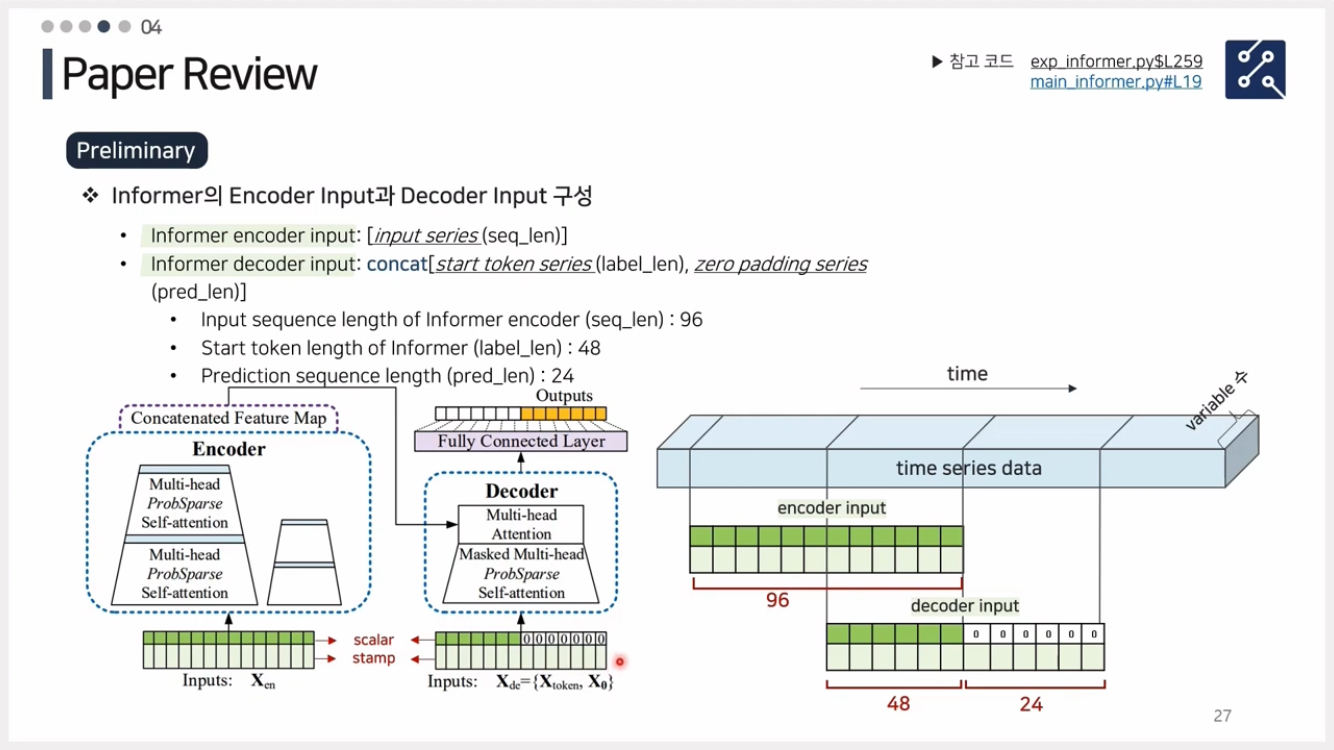

In [39]:
%cd /home/ubuntu/jonghee/gitclone/Informer2020

/home/ubuntu/jonghee/gitclone/Informer2020


In [40]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [41]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' ###### 개인 데이터는 custom으로 해야한다. ######
args.root_path = '../../dataset/' ###### root path of data file ######
args.data_path = 'df_train.csv' ###### data file ######
args.features = 'MS' ###### forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'pressure' ###### target feature in S or MS task ######
args.freq = 's' ###### freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 160 ###### input sequence length of Informer encoder, 한 breath_id마다 80개의 데이터라서
args.label_len = 80 ###### start token length of Informer decoder, 예제 코드보니까 seq_len의 반이라서...
args.pred_len = 40 ###### prediction sequence length, 이건 또 label_len의 반이라서...
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]
# 우리가 예측해야하는 건 80개의 앞부분 40개이다!


args.enc_in = 26 ###### encoder input size, date컬럼을 제외한 나머지 컬럼 개수
args.dec_in = 26 ###### decoder input size, date컬럼을 제외한 나머지 컬럼 개수
args.c_out = 1 ###### output size, 우린 pressure 하나만 필요하다
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.do_predict= True ############### 이걸로 예측한다! ################
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 's' # 오잉 왜 h로 돼있었지??

args.batch_size = 512 ###### 배치 사이즈 ######
args.learning_rate = 0.0001
args.loss = 'mae'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 20 ###### 에폭 ######
args.patience = 3
args.des = 'exp'
args.inverse = True # 이걸로 standardscaler로 바뀐 값을 되돌려 놓는다!

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = True
args.devices = '0,1'

In [42]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [43]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'custom', 'root_path': '../../dataset/', 'data_path': 'df_train.csv', 'features': 'MS', 'target': 'pressure', 'freq': 's', 'checkpoints': './informer_checkpoints', 'seq_len': 160, 'label_len': 80, 'pred_len': 40, 'enc_in': 26, 'dec_in': 26, 'c_out': 1, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'do_predict': True, 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 512, 'learning_rate': 0.0001, 'loss': 'mae', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 20, 'patience': 3, 'des': 'exp', 'inverse': True, 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': True, 'devices': '0,1', 'detail_freq': 's'}


In [44]:
Exp = Exp_Informer

In [45]:
range(args.itr)

range(0, 1)

In [46]:
!nvidia-smi

Thu Nov  4 17:04:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:00:06.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |     11MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:00:07.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |     11MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [47]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftMS_sl160_ll80_pl40_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 3802480
val 543202
test 1086441
	iters: 100, epoch: 1 | loss: 278.4694214
	speed: 0.5141s/iter; left time: 76308.0994s
	iters: 200, epoch: 1 | loss: 241.7019806
	speed: 0.4575s/iter; left time: 67861.2244s
	iters: 300, epoch: 1 | loss: 222.8870544
	speed: 0.4570s/iter; left time: 67738.7375s
	iters: 400, epoch: 1 | loss: 231.2337036
	speed: 0.4555s/iter; left time: 67466.2175s
	iters: 500, epoch: 1 | loss: 226.6356354
	speed: 0.4534s/iter; left time: 67118.0964s
	iters: 600, epoch: 1 | loss: 225.4004059
	speed: 0.4639s/iter; left time: 68616.2040s
	iters: 700, epoch: 1 | loss: 211.8189240
	speed: 0.4628s/iter; left time: 68411.7547s
	iters: 800, epoch: 1 | loss: 218.0765228
	speed: 0.4569s/iter; left time: 67487.7923s
	iters: 900, epoch: 1 | loss: 211.6398773
	speed: 0.4609s/iter; left time: 68039.2843s
	iters: 1000

	iters: 1600, epoch: 2 | loss: 206.3281555
	speed: 0.4624s/iter; left time: 64505.5461s
	iters: 1700, epoch: 2 | loss: 184.5862427
	speed: 0.4584s/iter; left time: 63894.7333s
	iters: 1800, epoch: 2 | loss: 196.9922028
	speed: 0.4606s/iter; left time: 64154.3508s
	iters: 1900, epoch: 2 | loss: 202.6690216
	speed: 0.4606s/iter; left time: 64106.2822s
	iters: 2000, epoch: 2 | loss: 194.3111115
	speed: 0.4622s/iter; left time: 64295.2771s
	iters: 2100, epoch: 2 | loss: 203.2472382
	speed: 0.4650s/iter; left time: 64633.1416s
	iters: 2200, epoch: 2 | loss: 194.9748383
	speed: 0.4573s/iter; left time: 63520.7574s
	iters: 2300, epoch: 2 | loss: 208.1371918
	speed: 0.4571s/iter; left time: 63439.9251s
	iters: 2400, epoch: 2 | loss: 196.2080383
	speed: 0.4550s/iter; left time: 63107.1621s
	iters: 2500, epoch: 2 | loss: 191.6546326
	speed: 0.4633s/iter; left time: 64217.2971s
	iters: 2600, epoch: 2 | loss: 180.1075745
	speed: 0.4646s/iter; left time: 64339.2135s
	iters: 2700, epoch: 2 | loss: 1

	iters: 3300, epoch: 3 | loss: 212.6348572
	speed: 0.4585s/iter; left time: 59777.1871s
	iters: 3400, epoch: 3 | loss: 186.2799072
	speed: 0.4603s/iter; left time: 59960.0853s
	iters: 3500, epoch: 3 | loss: 203.6451874
	speed: 0.4615s/iter; left time: 60071.4922s
	iters: 3600, epoch: 3 | loss: 217.6936951
	speed: 0.4651s/iter; left time: 60492.6876s
	iters: 3700, epoch: 3 | loss: 192.4888763
	speed: 0.4539s/iter; left time: 58989.8761s
	iters: 3800, epoch: 3 | loss: 204.2714233
	speed: 0.4565s/iter; left time: 59291.6198s
	iters: 3900, epoch: 3 | loss: 204.5334778
	speed: 0.4564s/iter; left time: 59229.4525s
	iters: 4000, epoch: 3 | loss: 217.7181396
	speed: 0.4562s/iter; left time: 59152.3117s
	iters: 4100, epoch: 3 | loss: 194.4388733
	speed: 0.4616s/iter; left time: 59812.6982s
	iters: 4200, epoch: 3 | loss: 198.0322418
	speed: 0.4638s/iter; left time: 60048.0360s
	iters: 4300, epoch: 3 | loss: 217.8147736
	speed: 0.4582s/iter; left time: 59274.3632s
	iters: 4400, epoch: 3 | loss: 2

	iters: 5000, epoch: 4 | loss: 203.6836395
	speed: 0.4610s/iter; left time: 55896.7550s
	iters: 5100, epoch: 4 | loss: 197.3465118
	speed: 0.4570s/iter; left time: 55366.6979s
	iters: 5200, epoch: 4 | loss: 198.5868225
	speed: 0.4631s/iter; left time: 56060.2404s
	iters: 5300, epoch: 4 | loss: 207.1116638
	speed: 0.4561s/iter; left time: 55163.9038s
	iters: 5400, epoch: 4 | loss: 216.6082001
	speed: 0.4619s/iter; left time: 55812.7216s
	iters: 5500, epoch: 4 | loss: 205.8221741
	speed: 0.4707s/iter; left time: 56838.4077s
	iters: 5600, epoch: 4 | loss: 200.5650482
	speed: 0.4585s/iter; left time: 55318.0846s
	iters: 5700, epoch: 4 | loss: 205.6445007
	speed: 0.4624s/iter; left time: 55735.4137s
	iters: 5800, epoch: 4 | loss: 210.0327301
	speed: 0.4542s/iter; left time: 54703.8728s
	iters: 5900, epoch: 4 | loss: 193.8825226
	speed: 0.4579s/iter; left time: 55106.4828s
	iters: 6000, epoch: 4 | loss: 208.3533325
	speed: 0.4658s/iter; left time: 56009.4594s
	iters: 6100, epoch: 4 | loss: 1

	iters: 6700, epoch: 5 | loss: 189.1015320
	speed: 0.4593s/iter; left time: 51491.0527s
	iters: 6800, epoch: 5 | loss: 198.1473236
	speed: 0.4576s/iter; left time: 51253.8565s
	iters: 6900, epoch: 5 | loss: 201.9599152
	speed: 0.4644s/iter; left time: 51978.4129s
	iters: 7000, epoch: 5 | loss: 201.5433960
	speed: 0.4552s/iter; left time: 50904.0005s
	iters: 7100, epoch: 5 | loss: 207.5971985
	speed: 0.4580s/iter; left time: 51163.7741s
	iters: 7200, epoch: 5 | loss: 191.0339661
	speed: 0.4582s/iter; left time: 51140.2301s
	iters: 7300, epoch: 5 | loss: 203.3748322
	speed: 0.4594s/iter; left time: 51226.9749s
	iters: 7400, epoch: 5 | loss: 186.7687531
	speed: 0.4628s/iter; left time: 51558.4519s
Epoch: 5 cost time: 3414.0789079666138
Epoch: 5, Steps: 7426 | Train Loss: 202.6560785 Vali Loss: 201.7071686 Test Loss: 204.2830048
EarlyStopping counter: 3 out of 3
Early stopping
>>>>>>>testing : informer_custom_ftMS_sl160_ll80_pl40_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_ex

In [ ]:
### 피처 엔지니어링을 했을 때 훈련 결과

Epoch: 5 cost time: 3414.0789079666138
Epoch: 5, Steps: 7426 | Train Loss: 202.6560785 Vali Loss: 201.7071686 Test Loss: 204.2830048
EarlyStopping counter: 3 out of 3
Early stopping
>>>>>>>testing : informer_custom_ftMS_sl160_ll80_pl40_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
test 1086441
test shape: (2121, 512, 40, 26) (2121, 512, 40, 1)
test shape: (1085952, 40, 26) (1085952, 40, 1)
mse:203.69911193847656, mae:11.657785415649414

# 훈련 결과 시각화

In [100]:
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

((1085952, 40, 26), (1085952, 40, 1))

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

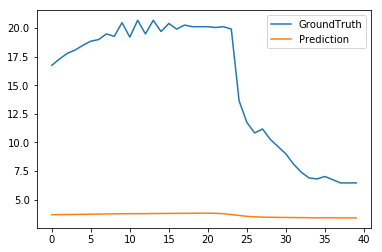

In [109]:
plt.figure()
plt.plot(trues[10,:,-1], label='GroundTruth')
plt.plot(preds[10,:,-1], label='Prediction')
plt.legend()
plt.show()

# !훈련이 아예 안됐다. 즉, 피처 엔지니어링을 해도 바이너리 값이 많아서 별 효과가 없다!

아마도 80개씩 개별 데이터 처럼 움직이는 상황에서 다음 80ㅐ의 앞부분인 40개를 맞추는게 쉽지 않았을 것이다.
그냥 이 데이터는 시계열로 예측하는 것이 옳지않다는 것이다.